# Performance evaluation of unsupervised stream anomaly detection algorithms on BETH dataset

In [ ]:
# !pip uninstall -y usad_beth

In [ ]:
# !pip install -e ..

In [1]:
from usad_beth.config import RAW_DATA_DIR, PROCESSED_DATA_DIR, REPORTS_DIR, FIGURES_DIR
from usad_beth.dataset import TRAINING_FILE, VALIDATION_FILE, TESTING_FILE
from usad_beth.plots import plot_events_order, plot_rocaucs, plot_times

import usad_beth.dataset
import usad_beth.features
import usad_beth.modeling


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Downloading and extracting dataset

In [2]:
usad_beth.dataset.main()

2025-03-04 21:16:01.334 | INFO     | usad_beth.dataset:main:36 - Downloading dataset...
2025-03-04 21:16:24.969 | SUCCESS  | usad_beth.dataset:main:38 - Downloading dataset completed.
2025-03-04 21:16:24.970 | INFO     | usad_beth.dataset:main:40 - Extracting dataset...
2025-03-04 21:16:25.893 | SUCCESS  | usad_beth.dataset:main:42 - Extracting dataset completed.


In [3]:
train_df  = pd.read_csv(RAW_DATA_DIR / TRAINING_FILE)
test_df = pd.read_csv(RAW_DATA_DIR / TESTING_FILE)

train_df_sorted = train_df.sort_values(['hostName', 'timestamp'], ignore_index=True)
test_df_sorted = test_df.sort_values(['hostName', 'timestamp'], ignore_index=True)

Checking events order in train and test sets

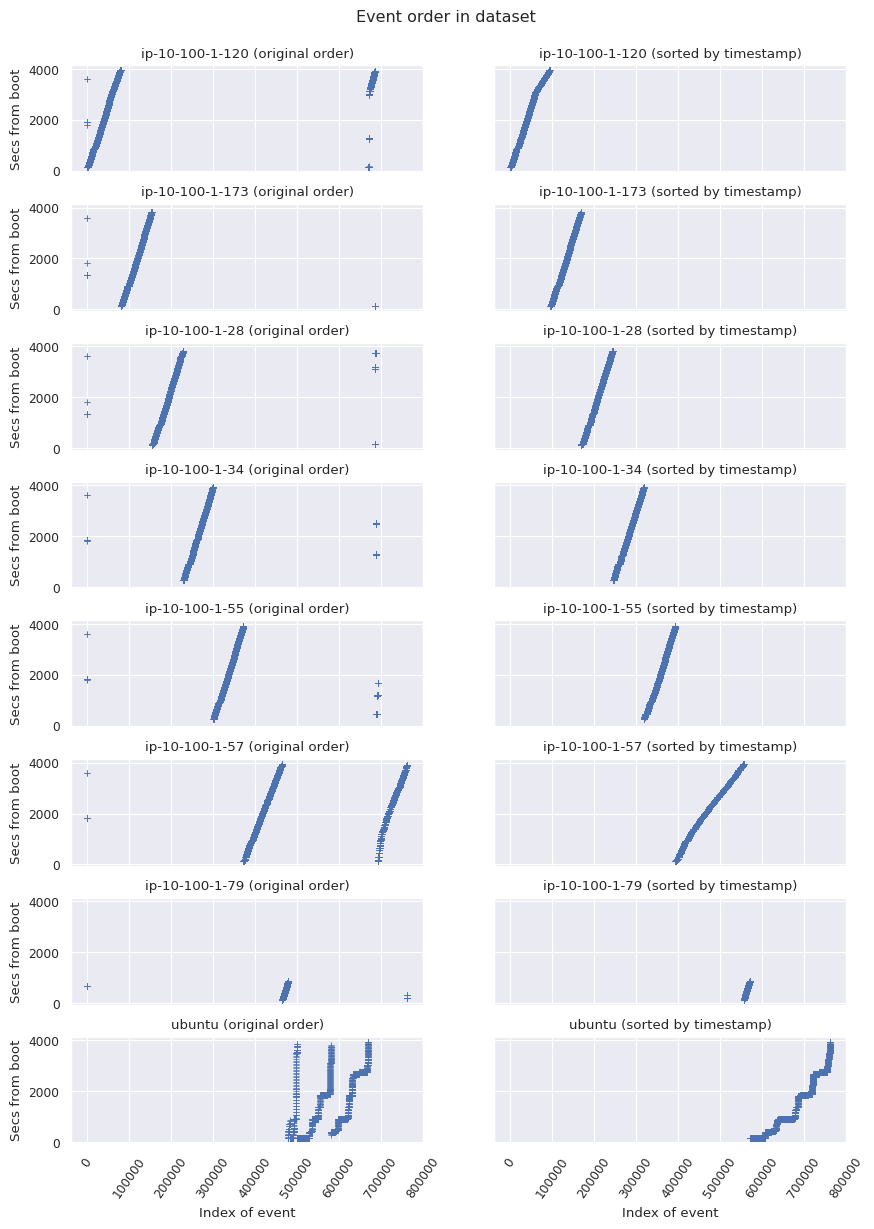

In [4]:
plot_events_order(train_df, train_df_sorted)

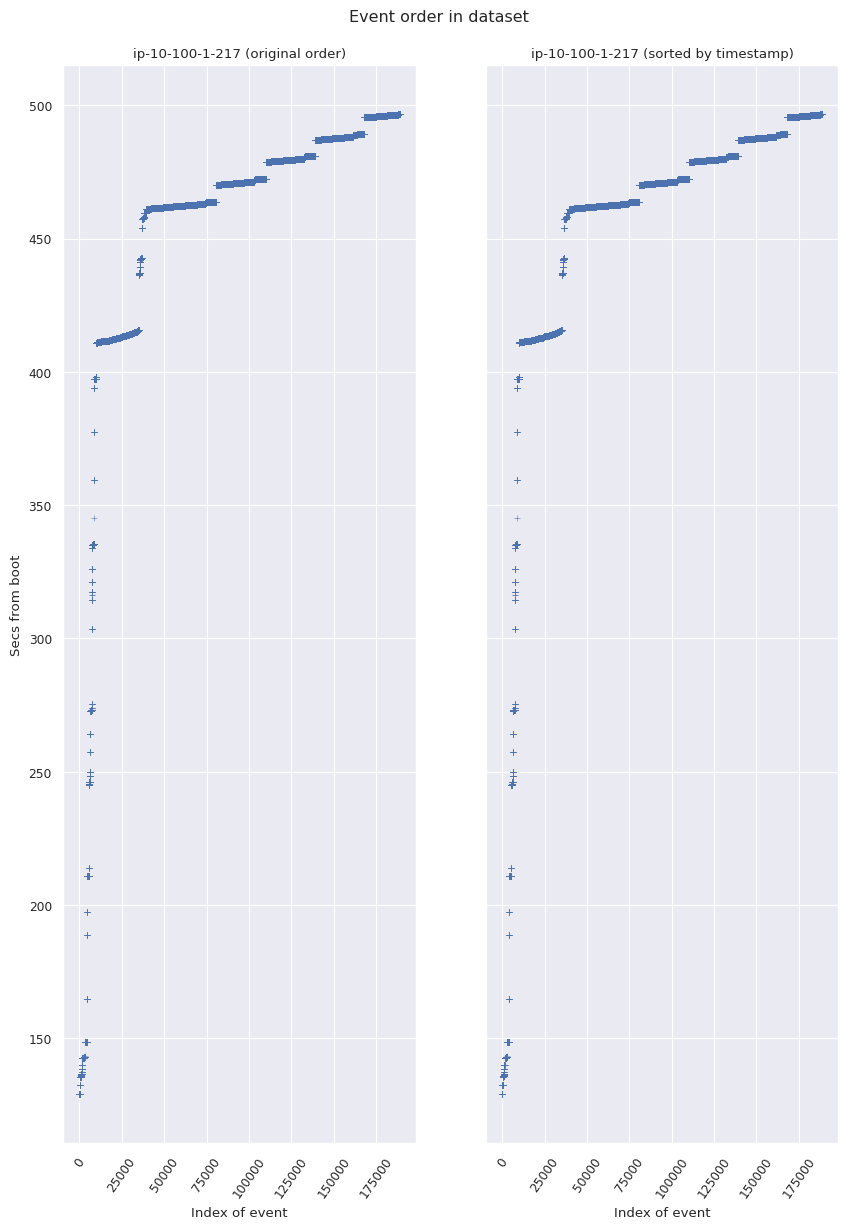

In [5]:
plot_events_order(test_df, test_df_sorted, output_name=FIGURES_DIR / "test_event_order.png")

Building feature dataframes

In [6]:
usad_beth.features.main()

2025-03-04 21:17:00.705 | INFO     | usad_beth.features:main:57 - Generating features from dataset...
2025-03-04 21:17:14.854 | SUCCESS  | usad_beth.features:main:79 - Features generation complete.
2025-03-04 21:17:14.854 | INFO     | usad_beth.features:main:81 - Saving features dataframes...
2025-03-04 21:17:21.092 | SUCCESS  | usad_beth.features:main:94 - Saving features dataframes completed.
2025-03-04 21:17:21.093 | INFO     | usad_beth.features:main:96 - Enriching train dataframe with parent process name...
2025-03-04 21:22:19.722 | SUCCESS  | usad_beth.features:main:99 - Enriching completed.
2025-03-04 21:22:19.733 | INFO     | usad_beth.features:main:101 - Enriching test dataframe with parent process name...
2025-03-04 21:23:33.247 | SUCCESS  | usad_beth.features:main:103 - Enriching completed.
2025-03-04 21:23:33.247 | INFO     | usad_beth.features:main:105 - Enriching sorted train dataframe with parent process name...
2025-03-04 21:28:30.048 | SUCCESS  | usad_beth.features:mai

Running experiments

In [7]:
usad_beth.modeling.NUM_SEEDS = 1
usad_beth.modeling.MODELNAMES = ["OCSVM"]
df_eval_results = usad_beth.modeling.main()

2025-03-04 21:28:38.076 | INFO     | usad_beth.modeling:main:233 - SEED = 2025
2025-03-04 21:28:38.077 | INFO     | usad_beth.modeling:main:235 - Model OCSVM evaluation
2025-03-04 21:28:38.077 | INFO     | usad_beth.modeling:main:237 - Train without sorting and enriching


763144it [00:50, 15046.99it/s]
188967it [00:10, 17979.16it/s]


2025-03-04 21:29:39.392 | SUCCESS  | usad_beth.modeling:main:243 - Completed
2025-03-04 21:29:39.393 | INFO     | usad_beth.modeling:main:245 - Train with sorting


763144it [00:52, 14609.38it/s]
188967it [00:10, 17401.67it/s]


2025-03-04 21:30:42.581 | SUCCESS  | usad_beth.modeling:main:251 - Completed
2025-03-04 21:30:42.581 | INFO     | usad_beth.modeling:main:253 - Train with enriching


763144it [00:49, 15492.09it/s]
188967it [00:13, 14296.25it/s]


2025-03-04 21:31:45.168 | SUCCESS  | usad_beth.modeling:main:261 - Completed
2025-03-04 21:31:45.169 | INFO     | usad_beth.modeling:main:263 - Train with sorting and enriching


763144it [00:49, 15368.41it/s]
188967it [00:13, 13858.08it/s]


2025-03-04 21:32:48.558 | SUCCESS  | usad_beth.modeling:main:271 - Completed
2025-03-04 21:32:48.558 | SUCCESS  | usad_beth.modeling:main:273 - Model OCSVM evaluation completed


In [8]:
df_eval_results

,Algorithm,Seed,Sus_or_evil,Sorted_train,Enriched_parent_process_name,Time,ROCAUC_score
0,OCSVM,2025,sus,no,no,61.231108,"(0.7430580059169191, False)"
1,OCSVM,2025,evil,no,no,61.231108,"(0.6585040819798228, False)"
2,OCSVM,2025,sus,yes,no,63.098479,"(0.7652404125443881, False)"
3,OCSVM,2025,evil,yes,no,63.098479,"(0.7111140472272613, False)"
4,OCSVM,2025,sus,no,yes,62.472742,"(0.7659733946363961, False)"
5,OCSVM,2025,evil,no,yes,62.472742,"(0.675730338089435, False)"
6,OCSVM,2025,sus,yes,yes,63.288051,"(0.7311653258197345, False)"
7,OCSVM,2025,evil,yes,yes,63.288051,"(0.5722206124192623, False)"


In [9]:
df_eval_results["ROCAUC_is_inverted"] = df_eval_results["ROCAUC_score"].apply(lambda x: x[1])
df_eval_results["ROCAUC_score"] = df_eval_results["ROCAUC_score"].apply(lambda x: x[0])

## Results

In [10]:
df_eval_results = pd.read_csv(REPORTS_DIR / "eval_results_full.csv", index_col=0)
df_eval_results

,Algorithm,Seed,Sus_or_evil,Sorted_train,Enriched_parent_process_name,Time,ROCAUC_score,ROCAUC_is_inverted
0,OCSVM,2025,sus,no,no,54.902707,0.743058,False
1,OCSVM,2025,evil,no,no,54.902707,0.658504,False
2,OCSVM,2025,sus,yes,no,56.241050,0.765240,False
3,OCSVM,2025,evil,yes,no,56.241050,0.711114,False
4,OCSVM,2025,sus,no,yes,54.140141,0.765973,False
...,...,...,...,...,...,...,...,...
395,Storm,2029,evil,yes,no,3237.162614,0.931848,False
396,Storm,2029,sus,no,yes,3219.140115,0.913466,False
397,Storm,2029,evil,no,yes,3219.140115,0.931173,False
398,Storm,2029,sus,yes,yes,3221.225365,0.913466,False


Showing unstable results of HSTree

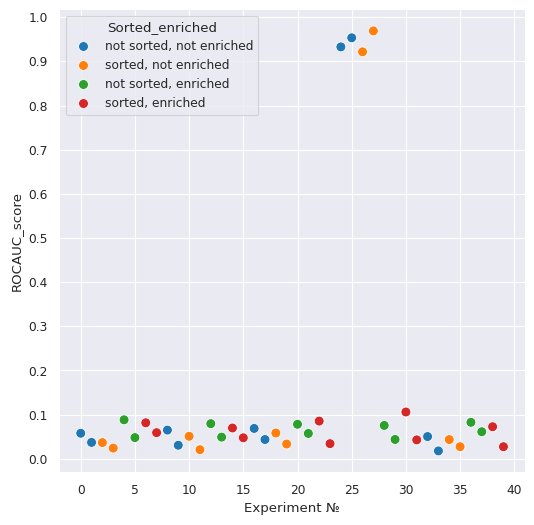

In [11]:
hstree_results = df_eval_results[df_eval_results["Algorithm"] == "HSTree"]

hstree_results["Sorted_enriched"] = hstree_results.apply(lambda x:  x["Sorted_train"] + "," + x["Enriched_parent_process_name"] , axis=1)

dict = {"no,no": "not sorted, not enriched",
        "no,yes": "not sorted, enriched",
        "yes,no": "sorted, not enriched",
        "yes,yes": "sorted, enriched"}
hstree_results.replace({"Sorted_enriched" : dict}, inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

sns.set_theme()
sns.set_context("paper")
sns.despine(bottom=True, left=True)

g = sns.scatterplot(x = range(hstree_results.shape[0]), y = "ROCAUC_score",
            hue = "Sorted_enriched",
            data = hstree_results,    
            s=50,       
            palette=sns.color_palette("tab10"))


g.set(xlabel="Experiment №", ylabel="ROCAUC_score", yticks=np.arange(0.0,1.1,0.1))

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

fig.savefig(FIGURES_DIR / "rocaucs_hstree.png", dpi=300)

In [12]:
df_eval_results[["Algorithm", "Time", "ROCAUC_score",
                 "Sus_or_evil", "Sorted_train", "Enriched_parent_process_name"]]\
    .groupby(["Algorithm", "Sus_or_evil", "Sorted_train", "Enriched_parent_process_name"])\
    .agg(["mean", "std"])\
    .head(16)

Time  \
                                                                         mean   
Algorithm  Sus_or_evil Sorted_train Enriched_parent_process_name                
HSTree     evil        no           no                             215.254392   
                                    yes                            212.872056   
                       yes          no                             209.177235   
                                    yes                            216.205733   
           sus         no           no                             215.254392   
                                    yes                            212.872056   
                       yes          no                             209.177235   
                                    yes                            216.205733   
IForestASD evil        no           no                            1865.587141   
                                    yes                           1872.441943   
                       yes          no                            1860.351595   
                                    yes                           1870.231189   
           sus         no           no                            1865.587141   
                                    yes                           1872.441943   
                       yes          no                            1860.351595   
                                    yes                           1870.231189   

                                                                             \
                                                                        std   
Algorithm  Sus_or_evil Sorted_train Enriched_parent_process_name              
HSTree     evil        no           no                             9.093861   
                                    yes                           15.805200   
                       yes          no                             7.671838   
                                    yes                            6.950287   
           sus         no           no                             9.093861   
                                    yes                           15.805200   
                       yes          no                             7.671838   
                                    yes                            6.950287   
IForestASD evil        no           no                            11.516507   
                                    yes                           12.068878   
                       yes          no                            10.495408   
                                    yes                           12.328112   
           sus         no           no                            11.516507   
                                    yes                           12.068878   
                       yes          no                            10.495408   
                                    yes                           12.328112   

                                                                 ROCAUC_score  \
                                                                         mean   
Algorithm  Sus_or_evil Sorted_train Enriched_parent_process_name                
HSTree     evil        no           no                               0.216432   
                                    yes                              0.051764   
                       yes          no                               0.214842   
                                    yes                              0.042099   
           sus         no           no                               0.234854   
                                    yes                              0.080712   
                       yes          no                               0.222159   
                                    yes                              0.082934   
IForestASD evil        no           no                               0.709921   
                                    yes                    

In [13]:
df_results = df_eval_results[["Algorithm", "Time", "ROCAUC_score",
                 "Sus_or_evil", "Sorted_train", "Enriched_parent_process_name"]]\
    .groupby(["Algorithm", "Sus_or_evil", "Sorted_train", "Enriched_parent_process_name"])\
    .agg(
        mean_time=pd.NamedAgg(column="Time", aggfunc="mean"),
        std_time=pd.NamedAgg(column="Time", aggfunc="std"),
        mean_rocauc=pd.NamedAgg(column="ROCAUC_score", aggfunc="mean"),
        std_rocauc=pd.NamedAgg(column="ROCAUC_score", aggfunc="std"),
        max_rocauc=pd.NamedAgg(column="ROCAUC_score", aggfunc="max"),
        min_rocauc=pd.NamedAgg(column="ROCAUC_score", aggfunc="min"),
        )\
    .reset_index()

In [14]:
df_results["Time"] = df_results.apply(lambda x: f"{x['mean_time']:.3f}" + '±'+ f"{x['std_time']:.3f}", axis=1)
df_results["ROCAUC"] = df_results.apply(lambda x: f"{x['mean_rocauc']:.3f}" + '±'+ f"{x['std_rocauc']:.3f}", axis=1)
df_results["Sorted_enriched"] = df_results.apply(lambda x:  x["Sorted_train"] + "," + x["Enriched_parent_process_name"] , axis=1)

dict = {"no,no": "not sorted, not enriched",
        "no,yes": "not sorted, enriched",
        "yes,no": "sorted, not enriched",
        "yes,yes": "sorted, enriched"}
df_results.replace({"Sorted_enriched" : dict}, inplace=True)

In [15]:
df_results[["Algorithm", "Sus_or_evil", "Sorted_train", "Enriched_parent_process_name", \
            "Time", "ROCAUC"]].to_csv(REPORTS_DIR / "df_results_print.csv")

In [16]:
df_results

,Algorithm,Sus_or_evil,Sorted_train,Enriched_parent_process_name,mean_time,std_time,mean_rocauc,std_rocauc,max_rocauc,min_rocauc,Time,ROCAUC,Sorted_enriched
0,HSTree,evil,no,no,215.254392,9.093861,0.216432,0.412122,0.953460,0.017689,215.254±9.094,0.216±0.412,"not sorted, not enriched"
1,HSTree,evil,no,yes,212.872056,15.805200,0.051764,0.007195,0.061128,0.043627,212.872±15.805,0.052±0.007,"not sorted, enriched"
2,HSTree,evil,yes,no,209.177235,7.671838,0.214842,0.421636,0.969040,0.020498,209.177±7.672,0.215±0.422,"sorted, not enriched"
3,HSTree,evil,yes,yes,216.205733,6.950287,0.042099,0.012249,0.059018,0.027207,216.206±6.950,0.042±0.012,"sorted, enriched"
4,HSTree,sus,no,no,215.254392,9.093861,0.234854,0.390248,0.932836,0.050202,215.254±9.094,0.235±0.390,"not sorted, not enriched"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,xStream,evil,yes,yes,702.592074,2.585222,0.917295,0.003472,0.921874,0.912378,702.592±2.585,0.917±0.003,"sorted, enriched"
76,xStream,sus,no,no,680.400862,3.901906,0.882046,0.011170,0.890585,0.863441,680.401±3.902,0.882±0.011,"not sorted, not enriched"
77,xStream,sus,no,yes,701.266787,2.617788,0.880527,0.006607,0.888496,0.870276,701.267±2.618,0.881±0.007,"not sorted, enriched"
78,xStream,sus,yes,no,681.296280,3.362919,0.880236,0.011734,0.888556,0.859857,681.296±3.363,0.880±0.012,"sorted, not enriched"


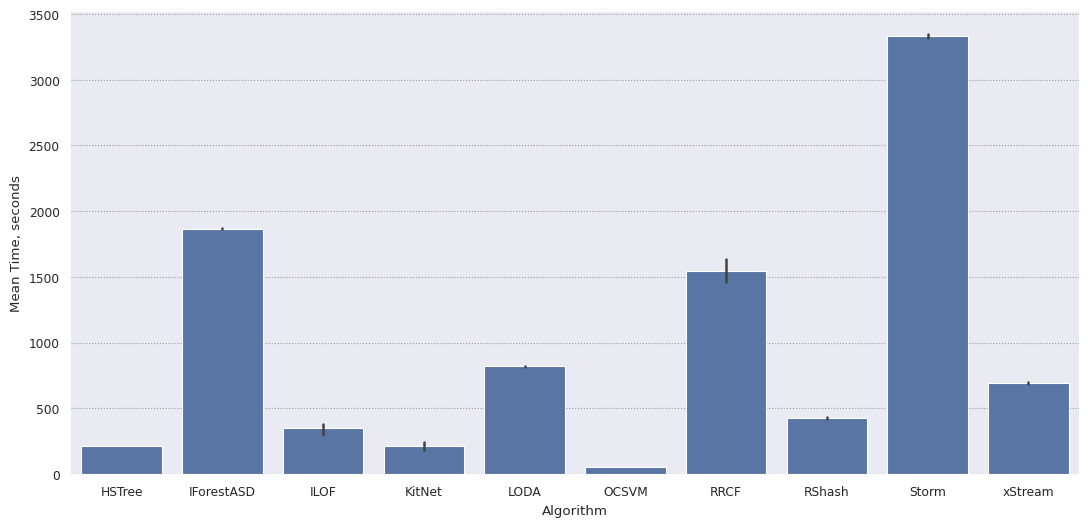

In [17]:
plot_times(df_results)

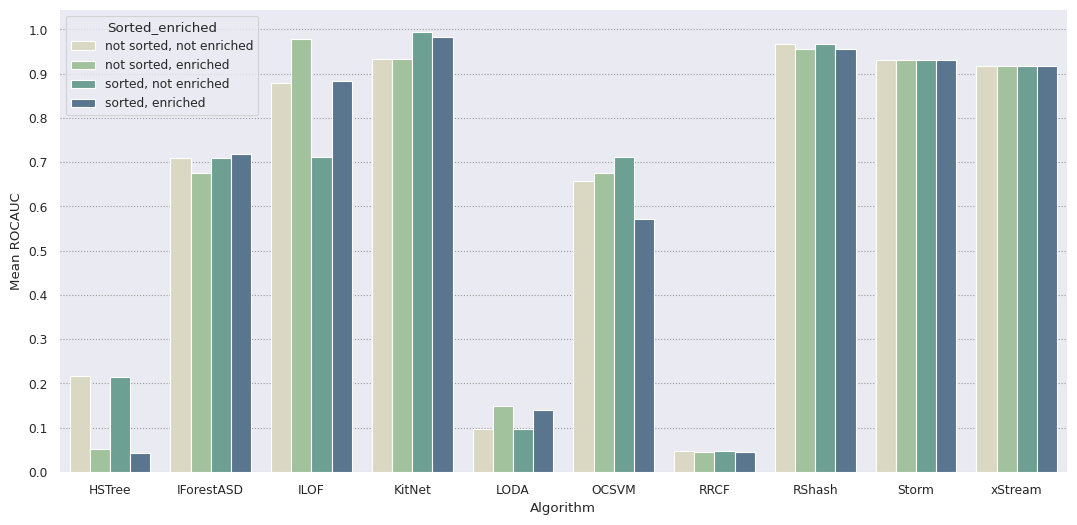

In [18]:
plot_rocaucs(df_results)

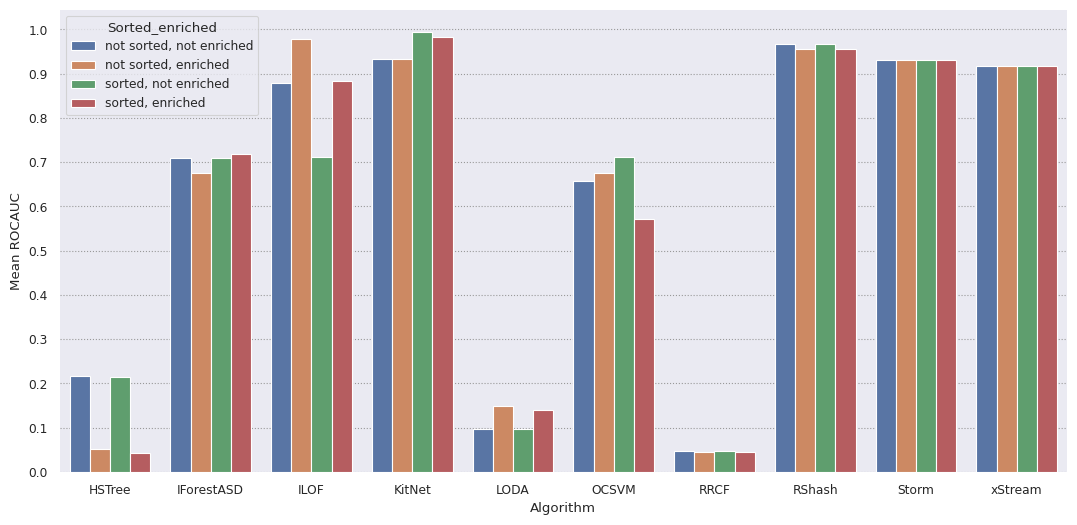

In [19]:
plot_rocaucs(df_results, sus_or_evil="evil", output_name="rocaucs_evil.png")